In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel("Export_reference__mots_clefs.xlsx")
df

,REFERENCE,TITRE,MOTCLE,Unnamed: 3,Unnamed: 4
0,SPA 82 A 2979,Chanak Kalessi. Vue de la ville. [Légende d'or...,Militaire ; Ville ; Paysage ; Transport mariti...,NaN,NaN
1,D0388-020-001-2179,(F[or]t D[auphin]). Bastion du fort Flacourt. ...,Infrastructure militaire ; Bastion ; Architect...,NaN,NaN
2,D0370-002-001-0009,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
3,D0370-002-001-0010,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Béret ; Montre ;...,NaN,NaN
4,D0370-002-001-0011,Mansouria. 1958. [légende d'origine],Population civile ; Soigner ; Troupes aéroport...,NaN,NaN
...,...,...,...,...,...
132114,2021_ECPAD_053_X_003_435,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN
132115,2021_ECPAD_053_X_003_438,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132116,2021_ECPAD_053_X_003_439,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Croix de Lorraine,NaN,NaN
132117,2021_ECPAD_053_X_003_444,Le musée de l'Ordre de la Libération.,Musée ; Libération ; Drapeau ; Armée Allemagne...,NaN,NaN


In [24]:
df.dtypes

REFERENCE     object
TITRE         object
MOTCLE        object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [25]:
df = df.drop(["Unnamed: 3","Unnamed: 4"], axis=1).astype("str")


In [26]:
df_mot_cle = df["MOTCLE"]

def split_word(el : str):
    return el.split(";")
df_mot_cle = df_mot_cle.apply(split_word)
df_mot_cle

0         [Militaire ,  Ville ,  Paysage ,  Transport ma...
1         [Infrastructure militaire ,  Bastion ,  Archit...
2         [Population civile ,  Soigner ,  Béret ,  Mont...
3         [Population civile ,  Soigner ,  Béret ,  Mont...
4         [Population civile ,  Soigner ,  Troupes aérop...
                                ...                        
132114    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132115    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132116    [Musée ,  Libération ,  Drapeau ,  Croix de Lo...
132117    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
132118    [Musée ,  Libération ,  Drapeau ,  Armée Allem...
Name: MOTCLE, Length: 132119, dtype: object

In [27]:
import random
random.shuffle(df_mot_cle)
df_mot_cle[:100]

0     [Musée ,  Décoration ,  Général ,  Croix de gu...
1     [Opération Barkhane ,  Dromadaire ,  Arbre ,  ...
2     [Armée Egypte ,  Prisonnier de guerre ,  Echan...
3     [Opération Barkhane ,  2e REP ,  Personnel fém...
4     [Opération Barkhane ,  Pilote ,  Equipage ,  C...
                            ...                        
95    [7e BCA ,  Exercice ,  Entraînement ,  Survie ...
96    [Opération Barkhane ,  Désert ,  Convoi ,  Nui...
97    [Bâtiment de projection et de commandement ,  ...
98    [Képi ,  Photographie ,  Décoration ,  Médaill...
99    [Armée de Terre ,  2e armée ,  Soldat ,  Ambia...
Name: MOTCLE, Length: 100, dtype: object

Perform a One hot encoding with sklearn

In [28]:
def delete_quote(l: [str]):
    for i,s in enumerate(l):#type: str
        l[i] = s.replace('"',"").replace(" ","")
    return l
df_mot_cle = df_mot_cle.map(delete_quote)

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
df_light = df_mot_cle
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df_light),columns=mlb.classes_,index=df_light.index)
res

,1.Fallschirmjäger.Division,1.Rauembootsflottille,"10,5cmK16","10,5cmSeekanone","10,5cmleFH18","10,5cmleFH18M",100mm,101eAirborneDivision,101eRG,101eRI,...,dansunerued'Hanoï.,devantl'hôtelMétropoled'Hanoï.,logiciel,marmite,nan,sMG-08,sontàl'entréeduCampPressed'Hanoï.,tournéed'inspection,Éolienne,Étang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
len(res)

132119

In [31]:
sum_df = res.sum().sort_values(ascending=False)
sum_df

Portrait              13658
Arbre                  8513
Soldat                 8512
OpérationBarkhane      8081
Cérémoniemilitaire     8018
                      ...  
533eGT                    1
ArtillerieSerbie          1
ArtillerieURSS            1
52eRI                     1
5-Le.Div.                 1
Length: 7270, dtype: int64

In [32]:
sum_df.apply(lambda x: x/len(res)*100)

Portrait              10.337650
Arbre                  6.443434
Soldat                 6.442677
OpérationBarkhane      6.116456
Cérémoniemilitaire     6.068771
                        ...    
533eGT                 0.000757
ArtillerieSerbie       0.000757
ArtillerieURSS         0.000757
52eRI                  0.000757
5-Le.Div.              0.000757
Length: 7270, dtype: float64

In [33]:
biggest_df = sum_df[:200]
biggest_df

Portrait                     13658
Arbre                         8513
Soldat                        8512
OpérationBarkhane             8081
Cérémoniemilitaire            8018
                             ...  
Voiture                       1129
AviondecombatFrancepost45     1125
Salut                         1123
Observer                      1123
Automobile                    1107
Length: 200, dtype: int64

In [43]:
sum_df["MissionLynx"]

5351

In [34]:
res_biggest = res[biggest_df.index]

In [35]:
corr = res_biggest.corr()

In [36]:
corr = corr.round(4)

<AxesSubplot:>

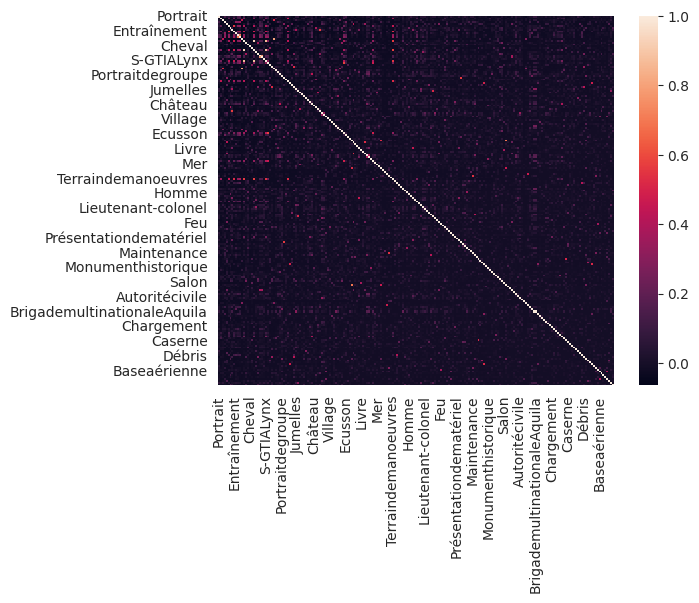

In [37]:
import seaborn  as sns
sns.heatmap(corr)

In [38]:
dict_cor = corr.to_dict()
for el in dict_cor: #type:dict
    dict_cor[el] = {k: v for k,v in dict_cor[el].items() if ( dict_cor[el][k] > 0.5 or dict_cor[el][k] < -0.6)and el != k}

In [39]:
dict_cor

{'Portrait': {},
 'Arbre': {},
 'Soldat': {'Tombe': 0.5144},
 'OpérationBarkhane': {},
 'Cérémoniemilitaire': {},
 'Exercice': {'Entraînement': 0.5399},
 'Populationcivile': {},
 'ONU': {'FMSB': 0.5684},
 'Entraînement': {'Exercice': 0.5399, 'Terraindemanoeuvres': 0.5238},
 'Désert': {},
 'Casque': {'Giletpare-balles': 0.6944},
 'Giletpare-balles': {'Casque': 0.6944},
 'Cimetière': {'Tombe': 0.8079},
 'OTAN': {'MissionLynx': 0.9254,
  'S-GTIALynx': 0.8601,
  'Terraindemanoeuvres': 0.5585},
 'Ville': {},
 'Campmilitaire': {},
 'Cheval': {},
 'Visite': {},
 'MissionLynx': {'OTAN': 0.9254,
  'S-GTIALynx': 0.8736,
  'Terraindemanoeuvres': 0.5703},
 'Carte': {},
 'Immeuble': {},
 'FusilFrancepost45': {'FAMAS': 0.7778},
 'FAMAS': {'FusilFrancepost45': 0.7778},
 'ArméedeTerre': {},
 'S-GTIALynx': {'OTAN': 0.8601,
  'MissionLynx': 0.8736,
  'Terraindemanoeuvres': 0.5488},
 'LégionEtrangère': {'Légionnaire': 0.5828},
 'MinistredelaDéfense': {},
 'Ruine': {'Destruction': 0.5198},
 'Tombe': {'Sol

In [40]:
import graphviz as gz

def get_color(w: float):
    color=["green","blue","orange","red","black"]
    return color[int((w*len(color)))]

def dict_to_graph(d_in) -> gz.Graph:
	gra = gz.Graph(strict=True)
	for k, d in d_in.items():
		for k2, v in d.items():
			gra.edge(k, k2, label=str(v),color=get_color(v))
	return gra
g = dict_to_graph(dict_cor)

In [41]:
g.render("test",format="png")

'test.png'

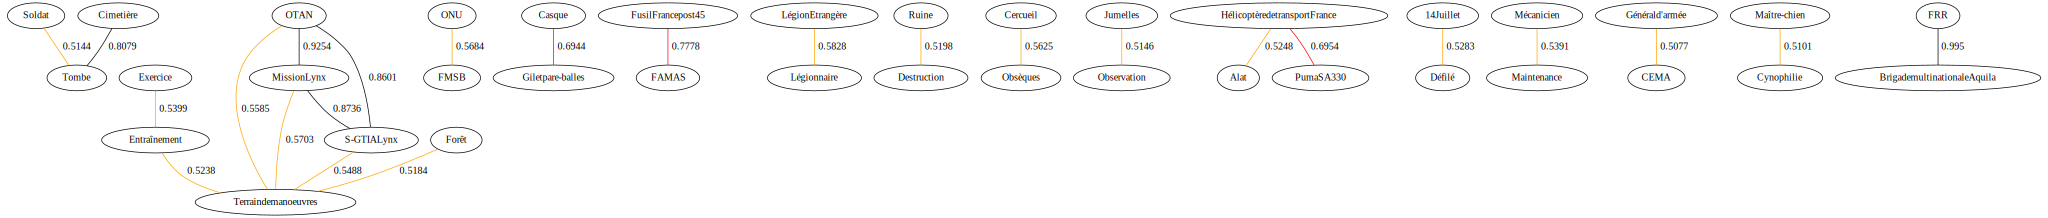

In [42]:
g